In [1]:
#Linear_Regression
#imports
import pandas as pd
import matplotlib.pyplot as plt

#this allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
#read data into a DataFrame
data = pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
data.shape

(200, 4)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

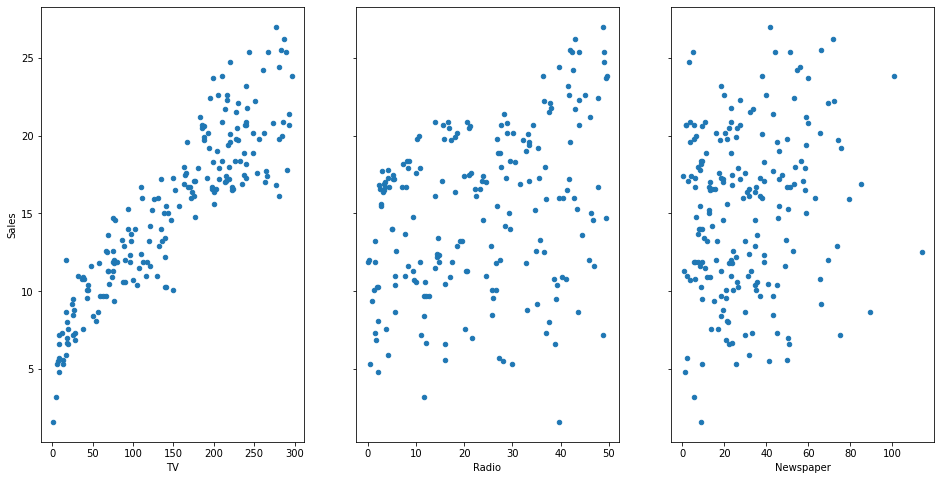

In [4]:
#visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1,3,sharey=True)
data.plot(kind='scatter',x='TV',y='Sales',ax=axs[0],figsize=(16,8))
data.plot(kind='scatter',x='Radio',y='Sales',ax=axs[1])
data.plot(kind='scatter',x='Newspaper',y='Sales',ax=axs[2])



In [5]:
#create x and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales

#follow the usal sklearn pattern:import,instantiate , fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)

#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

6.974821488229891
[0.05546477]


In [6]:
#manually calculating the prediction at $50,000
6.974821+0.05546477*50

9.7480595

In [9]:
#you have to create a DataFrame since the statsmodels formula interface expects it

X_new = pd.DataFrame({'TV':[50]})

In [10]:
X_new.head()

,TV
0,50


In [11]:
# use th model to make predictions on a new value
lm.predict(X_new)

array([9.74806001])

In [13]:
#plotting the least squares line

#create a dataframe with the minimum and maximum values of tv
X_new = pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [15]:
# make prediction for those x values and store

sinchu = lm.predict(X_new)
print(sinchu)

[ 7.01364683 23.41457946]


<AxesSubplot:xlabel='TV', ylabel='Sales'>

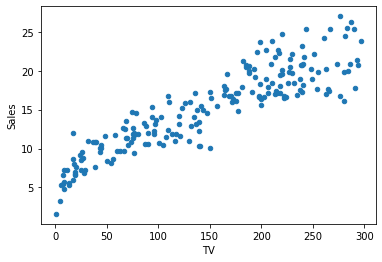

In [16]:
#first ,plot the observed data
data.plot(kind='scatter',x='TV',y='Sales')

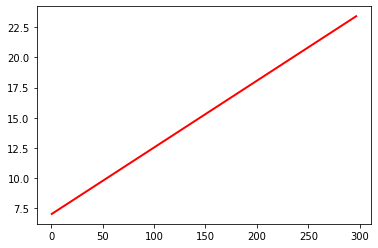

In [17]:
#then , plot the least squares line
plt.plot(X_new, sinchu, c='red' ,linewidth=2)

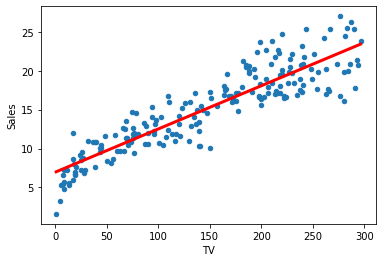

In [19]:
#first ,plot the observed data
data.plot(kind='scatter',x='TV',y='Sales')
#then , plot the least squares line
plt.plot(X_new, sinchu, c='red' ,linewidth=3)

In [20]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'Sales ~ TV',data= data).fit()
lm.conf_int()

,0,1
Intercept,6.338740,7.610903
TV,0.051727,0.059203


In [21]:
# print the probablity values for the model coefficients
lm.pvalues

Intercept    5.027719e-54
TV           7.927912e-74
dtype: float64

In [23]:
#print the R-squared value for the model

lm.rsquared

0.8121757029987414

In [24]:
# multiple linear Regression

#create x and y
feature_cols = ['TV','Radio','Newspaper']
X = data[feature_cols]
y = data.Sales


lm = LinearRegression()
lm.fit(X,y)

#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

4.625124078808653
[0.05444578 0.10700123 0.00033566]


In [25]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Mon, 13 Sep 2021   Prob (F-statistic):           8.13e-99
Time:                        11:50:26   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# only include Tv and Radio in the model
lm = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
lm.rsquared

0.9025896186081139

In [27]:
#add newspaper to the model (which we belive has no association with Sales)
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.rsquared

0.9025912899684558